In [1]:
# importing necessary libraries for reading images:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
import numpy as np

In [2]:
# reading the sample images:
#img = mpimg.imread('../test/road.jpg')
original_img = mpimg.imread('capture.jpg')

In [3]:
original_img.shape

(763, 996, 3)

In [4]:
img = 255-original_img

In [5]:
img

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

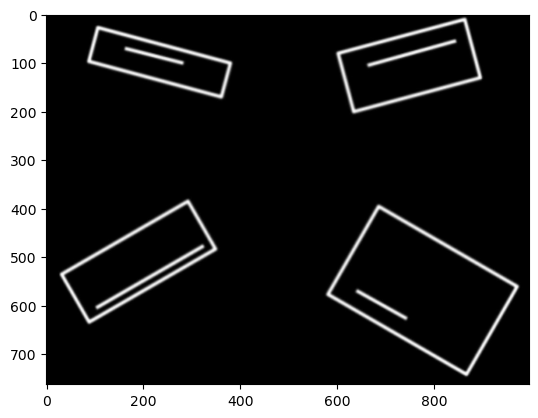

In [6]:
plt.imshow(img)

## All important functions:

In [7]:
## function: convert to grayscale image:
def gray_scale(image):
    gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    return gray_image

In [8]:
## function: do gaussian blur to remove norminal noises
def gaussian_blur(img, kernel_size):
    gaussian_blur= cv2.GaussianBlur(img, (kernel_size, kernel_size), 0) 
    # plt.imshow(gaussian_blur)
    # plt.show()
    return gaussian_blur

In [9]:
def canny_edge(img, low_threshold, high_threshold):
    # plt.imshow(img)
    # plt.show()
    
    canny_image=cv2.Canny(img, low_threshold, high_threshold)
    # plt.imshow(canny_image)
    # plt.show()
    return canny_image

In [10]:
def hough_lines(img, rho, theta, threshold, min_line_len, max_line_gap):
    
    lines = cv2.HoughLinesP(img, rho, theta, threshold, np.array([]), minLineLength=min_line_len, maxLineGap=max_line_gap)
    line_img = np.zeros((img.shape[0], img.shape[1], 3), dtype=np.uint8)
    #draw_lines(line_img, lines)
    return lines

## exploring the functions

In [11]:
img.shape

(763, 996, 3)

In [12]:
gray_img = gray_scale(img)

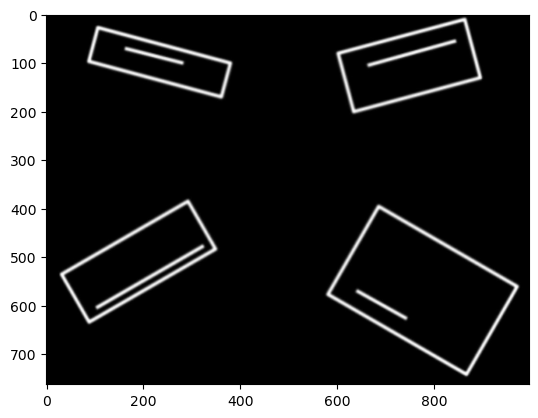

In [13]:
##matplotlib:
plt.imshow(gray_img, cmap='gray')
plt.show()

In [14]:
# cv2.imshow("out", gray_img)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

In [15]:
ret, thresh = cv2.threshold(gray_img, 180, 255, cv2.THRESH_BINARY)

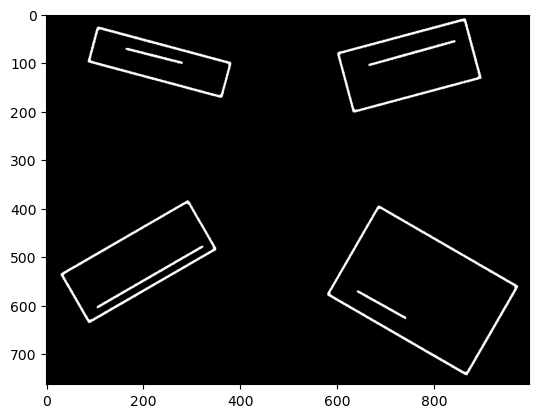

In [16]:
plt.imshow(thresh, cmap ='gray')

In [17]:
blur_img_gray = gaussian_blur(gray_img, 3)

In [18]:
blur_img_gray.max()

253

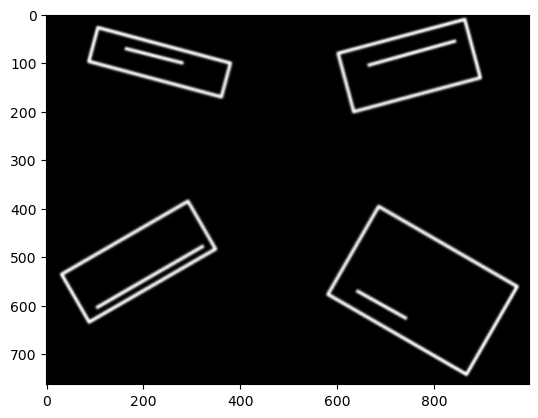

In [19]:
plt.imshow(blur_img_gray, cmap='gray')

In [20]:
canny_img = canny_edge(thresh,50,150)

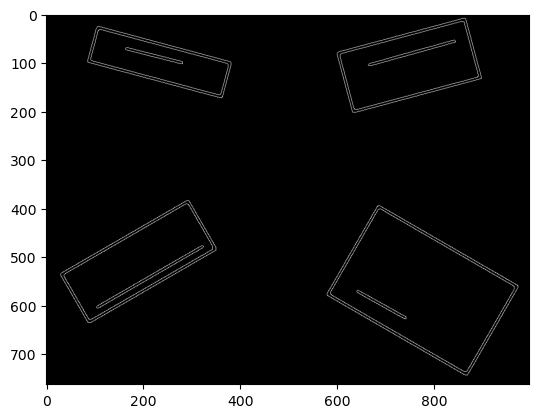

In [21]:
plt.imshow(canny_img, cmap= 'gray')

In [22]:
scale_percent = 160 # percent of original size
width = int(img.shape[1] * scale_percent / 100)
height = int(img.shape[0] * scale_percent / 100)
dim = (width, height)
  
# resize image
resized = cv2.resize(canny_img, dim, interpolation = cv2.INTER_AREA)

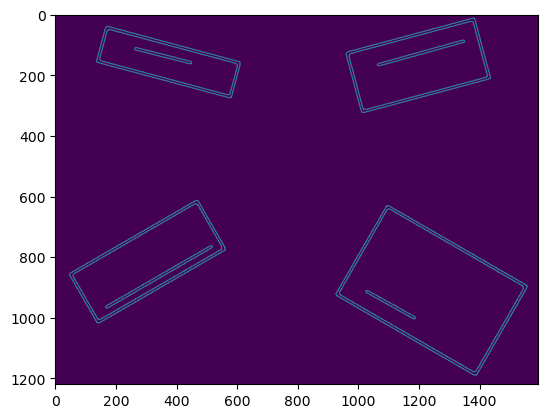

In [23]:
plt.imshow(resized)

In [24]:
rho = 1
theta = (np.pi/180)
threshold = 30
min_line_len = 40
max_line_gap = 5
lines = hough_lines(canny_img, rho, theta, threshold, min_line_len, max_line_gap)

In [25]:
lines

array([[[682, 397, 964, 560]],

       [[ 39, 535, 289, 391]],

       [[609,  81, 855,  15]],

       [[686, 394, 973, 560]],

       [[108,  25, 380,  98]],

       [[602,  78, 863,   8]],

       [[587, 578, 863, 737]],

       [[ 90, 636, 350, 486]],

       [[580, 580, 865, 744]],

       [[ 30, 535, 291, 384]],

       [[105, 602, 321, 477]],

       [[111,  31, 374, 102]],

       [[ 93, 629, 343, 485]],

       [[868, 744, 973, 562]],

       [[586, 574, 684, 403]],

       [[638, 202, 897, 133]],

       [[600,  81, 632, 202]],

       [[ 94,  96, 356, 166]],

       [[106, 606, 324, 480]],

       [[ 86,  99, 360, 172]],

       [[581, 581, 862, 743]],

       [[110, 605, 321, 483]],

       [[642, 196, 889, 130]],

       [[867, 736, 965, 566]],

       [[643, 569, 742, 624]],

       [[865,   9, 897, 130]],

       [[665, 103, 818,  59]],

       [[708,  95, 833,  61]],

       [[294, 393, 343, 478]],

       [[588, 579, 860, 736]],

       [[862,  16, 891, 127]],

       [

In [26]:
lines[0][0]

array([682, 397, 964, 560], dtype=int32)

In [27]:
cut_lines= lines[0:3]

In [28]:
x = lines[0][0][::3]
y = lines[0][0][1::2]
x,y

(array([682, 560], dtype=int32), array([397, 560], dtype=int32))

54


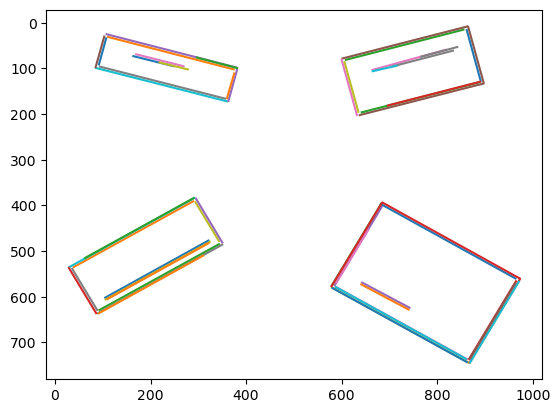

In [29]:
count = 0
for line in lines:
    # Extract x and y coordinates

    x = line[0][::2]
    y = line[0][1::2]
    plt.plot(x,y)
    count += 1
plt.gca().invert_yaxis()  

print(count)


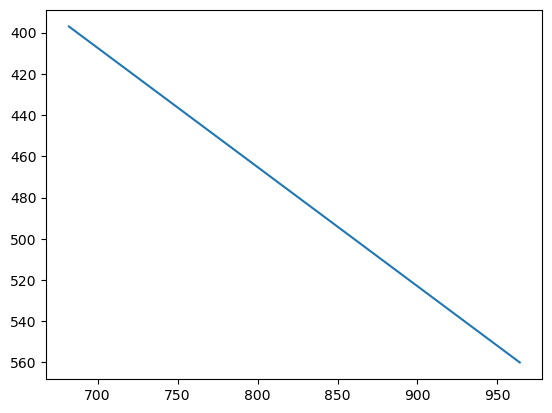

In [30]:
plt.plot(lines[0][0][::2], lines[0][0][1::2])
plt.gca().invert_yaxis()  

## trying to reduce dimensions by calculating the Euclidean distance:

In [31]:
from scipy.spatial.distance import directed_hausdorff
new_lines= []
dist_threshold = 5

for line in lines:
    p1 = (line[0][0],line[0][1])
    p2 = (line[0][2],line[0][3])
    for line2 in lines:
        p3 = (line2[0][0],line2[0][1])
        p4 = (line2[0][2],line2[0][3])
        distance = directed_hausdorff([p1,p2], [p3,p4])[0]
        if((distance<= dist_threshold) and (distance != 0.0)):
            temp_line = [(line[0][0]+line2[0][0])//2, (line[0][1]+line2[0][1])//2, (line[0][2]+line2[0][2])//2, (line[0][3]+line2[0][3])//2] 
            new_lines.append(temp_line)
            #print(distance)
            

In [32]:
len(new_lines)

12

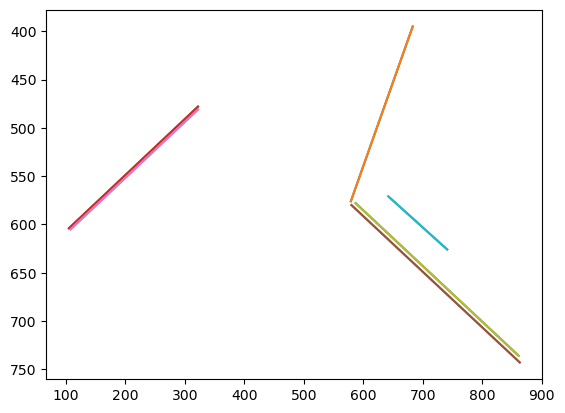

In [33]:
for line in new_lines:
    # Extract x and y coordinates

    x = line[::2]
    y = line[1::2]
    plt.plot(x,y)
    count += 1
plt.gca().invert_yaxis()  

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


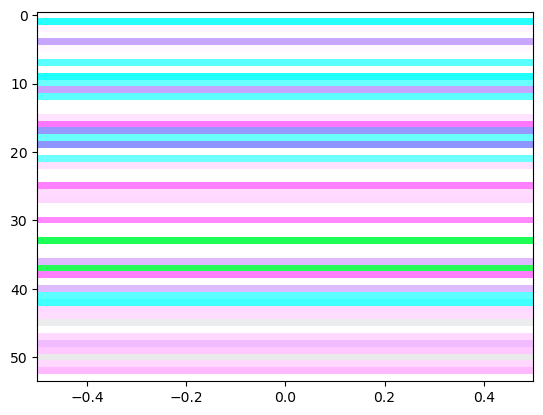

In [34]:
plt.imshow(lines,aspect= 'auto')

In [ ]:
copy_img = img.copy()
contours, hierarchy = cv2.findContours(canny_img, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
cv2.drawContours(copy_img, contours, -1, (0, 255, 0), 2, cv2.LINE_AA)

######
cv2.imshow('TREE', copy_img)

print(f"TREE: {hierarchy}")
print((hierarchy.shape))
cv2.waitKey(0)
cv2.destroyAllWindows()

TREE: [[[ 6 -1  1 -1]
  [-1 -1  2  0]
  [-1 -1  3  1]
  [-1 -1  4  2]
  [-1 -1  5  3]
  [-1 -1 -1  4]
  [12  0  7 -1]
  [-1 -1  8  6]
  [-1 -1  9  7]
  [-1 -1 10  8]
  [-1 -1 11  9]
  [-1 -1 -1 10]
  [18  6 13 -1]
  [-1 -1 14 12]
  [-1 -1 15 13]
  [-1 -1 16 14]
  [-1 -1 17 15]
  [-1 -1 -1 16]
  [-1 12 19 -1]
  [-1 -1 20 18]
  [-1 -1 21 19]
  [-1 -1 22 20]
  [-1 -1 23 21]
  [-1 -1 -1 22]]]
(1, 24, 4)


In [ ]:
hierarchy[0][0]
contours[0]

In [ ]:
all_length= {}
for i, contour in enumerate(contours): # loop over one contour area
    latest_hierarchy = hierarchy[0][i]
    ## 0 = previous, 1=next, 2= child, 3= parent
    if(latest_hierarchy[2]== -1): #child na vako ko case ma , we get the final line inside:
        top_parent = i
        _, _, w, h = cv2.boundingRect(contour)
        line_length = max(w, h)
        
        
        while(hierarchy[0][top_parent][3] != -1):
            top_parent = top_parent - 1
            
        all_length[top_parent] = line_length
    
## sorting in descending order. i.e. from largest length to shortest.
sorted_all_length= sorted(all_length.items(), key=lambda x: x[1], reverse=True)

In [ ]:
sorted_all_length

In [ ]:
## labeling the ractangle w.r.t the lenght of line inside it.
final_image = original_img.copy()
rank = 1
for contour_no, length in sorted_all_length:
    #getting boundary of contounr:
    x, y, w, h = cv2.boundingRect(contours[contour_no])
    rect = cv2.minAreaRect(contours[contour_no])
    center, size, angle = rect
    
    print(center, size, angle)
    
    cv2.putText(final_image, str(rank), (x + w//2, y + h + 10), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 0, 255), 2, cv2.LINE_AA)
    #cv2.drawContours(final_image, contours, -1, (0, 255, 0), 2, cv2.LINE_AA)
    rank += 1

# Display the image with numbers
cv2.imshow('Numbered Rectangles', final_image)
cv2.waitKey(0)
cv2.destroyAllWindows()